In [14]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime

In [15]:
start = datetime.datetime(2015,1,5)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start=start)
df_3045 = pdr.DataReader('3045.TW', 'yahoo', start=start)
df_2412 = pdr.DataReader('2412.TW', 'yahoo', start=start)
df_2412.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,93.300003,92.599998,93.300003,93.000000,4423000.0,77.177879
2015-01-06,92.900002,92.099998,92.699997,92.500000,6703000.0,76.762955
2015-01-07,92.900002,92.300003,92.500000,92.500000,5999000.0,76.762955
2015-01-08,93.300003,92.699997,93.199997,92.800003,6113000.0,77.011917
2015-01-09,93.500000,92.800003,93.500000,93.000000,3736000.0,77.177879


In [16]:
for stock in [df_2330, df_2492, df_3045, df_2412]:
    stock['normalized_price']=stock['Adj Close']/stock['Adj Close'].iloc[0]
df_2412.head()

,High,Low,Open,Close,Volume,Adj Close,normalized_price
Date,,,,,,,
2015-01-05,93.300003,92.599998,93.300003,93.000000,4423000.0,77.177879,1.000000
2015-01-06,92.900002,92.099998,92.699997,92.500000,6703000.0,76.762955,0.994624
2015-01-07,92.900002,92.300003,92.500000,92.500000,5999000.0,76.762955,0.994624
2015-01-08,93.300003,92.699997,93.199997,92.800003,6113000.0,77.011917,0.997850
2015-01-09,93.500000,92.800003,93.500000,93.000000,3736000.0,77.177879,1.000000


In [17]:
for stock, weight in zip([df_2330, df_2492, df_3045, df_2412],[0.3, 0.2, 0.25, 0.25]):
    stock['weighted daily return']=stock['normalized_price']*weight
df_2412.head()

,High,Low,Open,Close,Volume,Adj Close,normalized_price,weighted daily return
Date,,,,,,,,
2015-01-05,93.300003,92.599998,93.300003,93.000000,4423000.0,77.177879,1.000000,0.250000
2015-01-06,92.900002,92.099998,92.699997,92.500000,6703000.0,76.762955,0.994624,0.248656
2015-01-07,92.900002,92.300003,92.500000,92.500000,5999000.0,76.762955,0.994624,0.248656
2015-01-08,93.300003,92.699997,93.199997,92.800003,6113000.0,77.011917,0.997850,0.249462
2015-01-09,93.500000,92.800003,93.500000,93.000000,3736000.0,77.177879,1.000000,0.250000


In [18]:
df_total=pd.concat([df_2330['weighted daily return'], df_2492['weighted daily return'], df_3045['weighted daily return'], df_2412['weighted daily return']],axis=1)
df_total.columns=['2330', '2492', '3045', '2412']
df_total.head()

,2330,2492,3045,2412
Date,,,,
2015-01-05,0.300000,0.200000,0.250000,0.250000
2015-01-06,0.287097,0.194263,0.243990,0.248656
2015-01-07,0.288172,0.191804,0.241587,0.248656
2015-01-08,0.296774,0.194263,0.251202,0.249462
2015-01-09,0.288172,0.195902,0.253606,0.250000


In [19]:
df_total_money = df_total* 100000
df_total_money['Total Pos']=df_total_money.sum(axis=1)
df_total_money.head()


,2330,2492,3045,2412,Total Pos
Date,,,,,
2015-01-05,30000.000000,20000.000000,25000.000000,25000.000000,100000.000000
2015-01-06,28709.677419,19426.253159,24399.039771,24865.594706,97400.565056
2015-01-07,28817.204301,19180.360801,24158.652108,24865.594706,97021.811916
2015-01-08,29677.419355,19426.253159,25120.193832,24946.240354,99170.106700
2015-01-09,28817.204301,19590.182197,25360.579263,25000.000000,98767.965760


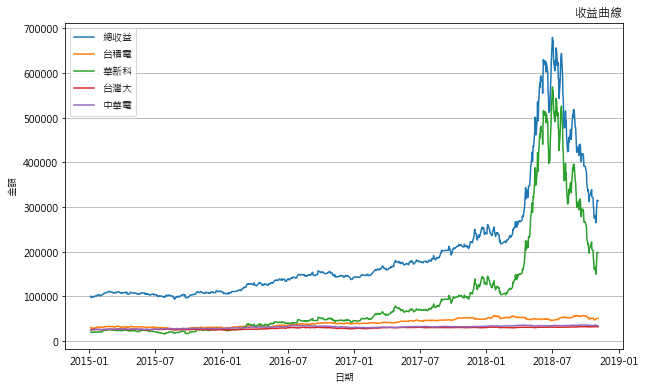

In [20]:
fig = plt.figure(figsize=(10, 6))
plt.plot(df_total_money['Total Pos'], '-' , label="總收益")
plt.plot(df_total_money['2330'], '-' , label="台積電")
plt.plot(df_total_money['2492'], '-' , label="華新科")
plt.plot(df_total_money['3045'], '-' , label="台灣大")
plt.plot(df_total_money['2412'], '-' , label="中華電")
plt.title('收益曲線',loc='right')

plt.xlabel('日期')
plt.ylabel('金額')
plt.grid(True, axis='y')
plt.legend()
fig.savefig('day26_01.png')

In [21]:
df_total_money['daily return']=df_total_money['Total Pos'].pct_change()
df_total_money['daily return'].head()

Date
2015-01-05         NaN
2015-01-06   -0.025994
2015-01-07   -0.003889
2015-01-08    0.022142
2015-01-09   -0.004055
Name: daily return, dtype: float64

In [22]:
print("累積收益率：",df_total_money['Total Pos'].iloc[-1]/df_total_money['Total Pos'].iloc[0]-1)

累積收益率： 2.1422835064362724


In [23]:
print("平均收益率：",df_total_money['daily return'].mean())

平均收益率： 0.0014527193039731144


In [24]:
print("收益率標準差：",df_total_money['daily return'].std())

收益率標準差： 0.021456679894525994


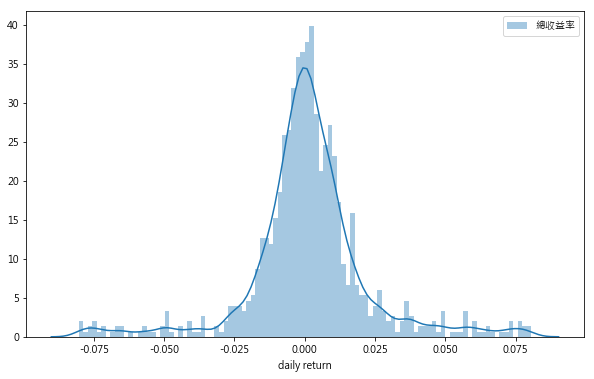

In [25]:
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
sns.distplot(df_total_money['daily return'].dropna(),bins=100, label="總收益率")
plt.legend()
fig.savefig('day26_02.png')

In [27]:
SR=df_total_money['daily return'].mean()/df_total_money['daily return'].std()
SR

0.06770475726506646

In [28]:
ASR=np.sqrt(252)*SR
ASR

1.0747797017961567